It says about The Device which tensorflow use

In [ ]:
device_name =tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError("GPU Device not found")
print("device: ",device_name)

device:  /device:GPU:0


In [ ]:
# download dataset
! wget https://data.transportation.gov/api/views/8ect-6jqj/rows.csv?accessType=DOWNLOAD

--2020-07-30 16:03:46--  https://data.transportation.gov/api/views/8ect-6jqj/rows.csv?accessType=DOWNLOAD
Resolving data.transportation.gov (data.transportation.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.transportation.gov (data.transportation.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   1.43G  2.46MB/s    in 9m 57s  

2020-07-30 16:13:44 (2.45 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1532183381]



In [ ]:
mv rows.csv?accessType = DOWNLOAD data.csv

In [ ]:
from matplotlib import pyplot as plt
import time
import numpy as np
import datetime
import pandas as pd
from datetime import datetime

In [ ]:
path='./data.csv'
df=pd.read_csv(path)
df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,O_Zone,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,3,NaN,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,3,NaN,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,2,26.54,-0.76,4,NaN,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2,37.52,11.20,2,NaN,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2,41.99,0.10,1,NaN,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,2,1.69,0.17,2,NaN,NaN,NaN,NaN,NaN,NaN,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,2,42.94,-4.79,1,NaN,NaN,NaN,NaN,NaN,NaN,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,2,24.12,-4.21,2,NaN,NaN,NaN,NaN,NaN,NaN,385,406,90.95,3.77,i-80
11850524,599,875,577,1113436854400,77.094,621.358,6042831.282,2133693.854,15.3,6.4,2,13.00,0.00,7,NaN,NaN,NaN,NaN,NaN,NaN,0,611,0.00,0.00,i-80


In [ ]:
df.describe()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,O_Zone,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway
count,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,2.481206e+06,1.185053e+07,1.185053e+07,1.185053e+07,1.185053e+07
mean,1.272563e+03,5.174503e+03,8.930487e+02,1.034354e+12,2.794686e+01,9.168111e+02,5.982983e+06,1.936843e+06,1.569627e+01,6.626444e+00,2.023950e+00,2.325818e+01,7.139650e-02,4.265429e+00,1.070281e+02,2.066535e+02,5.623104e-01,2.280568e+00,2.994319e+00,1.095966e+00,1.172694e+03,1.181218e+03,6.241838e+01,5.748307e+02
std,7.792891e+02,2.608943e+03,4.020496e+02,2.915348e+11,2.495012e+01,5.502644e+02,1.076391e+06,2.008363e+05,5.611962e+00,8.725600e-01,1.767097e-01,1.574182e+01,4.777451e+00,9.729954e+01,6.164081e+00,5.856079e+00,1.231587e+00,1.532248e+00,1.025410e+00,3.727930e-01,8.358323e+02,8.371065e+02,7.392077e+01,2.312329e+03
min,1.000000e+00,1.000000e+00,2.000000e+00,1.163019e+09,-3.256250e+02,0.000000e+00,2.230210e+06,1.375533e+06,3.500000e+00,2.000000e+00,1.000000e+00,0.000000e+00,-1.584000e+01,0.000000e+00,0.000000e+00,2.010000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.330000e+02,2.987000e+03,6.190000e+02,1.113437e+12,1.453300e+01,4.512030e+02,6.042757e+06,1.872593e+06,1.380000e+01,5.900000e+00,2.000000e+00,1.000000e+01,-5.200000e-01,2.000000e+00,1.020000e+02,2.010000e+02,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,4.690000e+02,4.790000e+02,3.140000e+01,1.690000e+00
50%,1.195000e+03,5.222000e+03,8.240000e+02,1.118847e+12,2.932300e+01,8.573970e+02,6.451253e+06,1.873236e+06,1.500000e+01,6.800000e+00,2.000000e+00,2.300000e+01,0.000000e+00,3.000000e+00,1.080000e+02,2.050000e+02,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.107000e+03,1.117000e+03,4.977000e+01,2.560000e+00
75%,1.824000e+03,7.354000e+03,1.038000e+03,1.118849e+12,4.332900e+01,1.351873e+03,6.452048e+06,2.133669e+06,1.600000e+01,7.000000e+00,2.000000e+00,3.500000e+01,7.300000e-01,5.000000e+00,1.080000e+02,2.080000e+02,0.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.783000e+03,1.793000e+03,7.434000e+01,4.200000e+00
max,3.366000e+03,1.169100e+04,2.434000e+03,1.118938e+12,1.608840e+02,2.235252e+03,6.452741e+06,2.134845e+06,7.770000e+01,8.500000e+00,3.000000e+00,9.530000e+01,1.584000e+01,9.999000e+03,1.230000e+02,2.230000e+02,5.000000e+00,6.000000e+00,4.000000e+00,3.000000e+00,3.366000e+03,3.366000e+03,1.855750e+03,3.186408e+04


In [ ]:
df.columns = ['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway', 'Time_Headway', 'Location']
df.drop(df[df.Location == "i-80"].index, inplace=True)
df.drop(df[df.Location == "lankershim"].index, inplace=True)
df.drop(df[df.Location == "peachtree"].index, inplace=True)
df.drop('D_Zone',axis=1,inplace=True)
df.drop('O_Zone',axis=1,inplace=True)
df.drop('Int_ID',axis=1,inplace=True)
df.drop('Section_ID',axis=1,inplace=True)
df.drop('Direction',axis=1,inplace=True)
df.drop('Movement',axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)
df.drop('Global_X',axis=1,inplace=True)
df.drop('Global_Y',axis=1,inplace=True)
df["Local_X"] = 0.3048 * df["Local_X"]
df["Local_Y"] = 0.3048 * df["Local_Y"]
df["v_length"] = 0.3048 * df["v_length"]
df["v_Width"] = 0.3048 * df["v_Width"]
df["v_Vel"] = 0.3048 * df["v_Vel"]
df["v_Acc"] = 0.3048 * df["v_Acc"]
df["Space_Headway"] = 0.3048 * df["Space_Headway"]
df["Vehicle_ID"]=df["Vehicle_ID"].astype('str')
df['Global_Time']=pd.to_datetime(df['Global_Time'],unit='ms')
df.sort_values(['Vehicle_ID','Total_Frames','Frame_ID','Global_Time','v_Class','v_length','v_Width'],inplace=True)
df['Global_Time']=df['Global_Time'].dt.strftime('%H:%M:%S:%f')
df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway
2555981,1,137,421,15:19:30:700000,16.050768,22.529597,4.5720,1.95072,2,7.620000,0.000000,5,0,0,0.0,0.0
7952522,1,138,421,15:19:30:800000,16.047110,23.291597,4.5720,1.95072,2,7.620000,0.000000,5,0,0,0.0,0.0
7911821,1,139,421,15:19:30:900000,16.043148,24.053292,4.5720,1.95072,2,7.620000,0.000000,5,0,0,0.0,0.0
7890998,1,140,421,15:19:31:000000,16.039186,24.815597,4.5720,1.95072,2,7.620000,0.000000,5,0,0,0.0,0.0
7289640,1,141,421,15:19:31:100000,16.035223,25.577597,4.5720,1.95072,2,7.620000,0.000000,5,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231334,999,5500,849,15:28:27:000000,5.756758,653.884697,3.9624,2.10312,2,13.289280,-0.847344,2,0,1003,0.0,0.0
7679818,999,5501,849,15:28:27:100000,5.755843,655.205700,3.9624,2.10312,2,13.283184,0.012192,2,0,1003,0.0,0.0
7895935,999,5502,849,15:28:27:200000,5.754929,656.493480,3.9624,2.10312,2,13.283184,0.000000,2,0,1003,0.0,0.0
7638461,999,5503,849,15:28:27:300000,5.753710,657.865080,3.9624,2.10312,2,13.283184,0.000000,2,0,1003,0.0,0.0


In [ ]:
df.drop(df[df.v_Class == 1].index, inplace=True)
df.drop(df[df.v_Class == 3].index, inplace=True)
df.drop('v_Width',axis=1,inplace=True)
df.drop('v_length',axis=1,inplace=True)
df.drop('v_Class',axis=1,inplace=True)
df['v_Vel']=(df['v_Vel']-df['v_Vel'].min())/(df['v_Vel'].max()-df['v_Vel'].min())
df['v_Acc']=(df['v_Acc']-df['v_Acc'].min())/(df['v_Acc'].max()-df['v_Acc'].min())
################################################ Group data WRT id & Frames #####################################################
grouped = df.groupby(['Vehicle_ID','Total_Frames'])
####################################################### List of Groups ##########################################################
Vehicles_Trajectoy=[]
for name, group in grouped:
    Vehicles_Trajectoy.append(group)
#################################################################################################################################
print("number of total trajectories    : ",len(Vehicles_Trajectoy))
lane_keep=[]
lane_change_left=[]
lane_change_right=[]

for path in Vehicles_Trajectoy:
    path.reset_index(inplace=True,drop=True)
    if len(path['Lane_ID'].value_counts())>1:
         for i in path['Lane_ID'].diff()[lambda x: x != 0].index.tolist():
             p=pd.concat([path[i-50:i],path[i:i+50]],ignore_index=True)
             if (p['Local_X'].max()-p['Local_X'].min()>3.5) and (p['Local_Y'].max()-p['Local_Y'].min()<300)and (len(p)==100):
                 trend=[p['Lane_ID'][h] for h in p['Lane_ID'].diff()[lambda x: x != 0].index.tolist()]

                 if (trend[0]<trend[1]) and (len(trend)==2):
                     lane_change_right.append(p)
                 elif (trend[0]>trend[1]) and (len(trend)==2):
                     lane_change_left.append(p)
    elif len(path['Lane_ID'].value_counts())==1:
         chunks = [path[x:x+100] for x in range(0, len(path), 100)]
         for i in chunks:
             if (i['Local_X'].max()-i['Local_X'].min()<1.5) and (len(i)==100):
                 lane_keep.append(i)
                 #print("#############Lane keep number ",len(i))


print("number of lane keep sequence           : ",len(lane_keep))
print("number of lane change left sequence    : ",len(lane_change_left))
print("number of lane change right sequence   : ",len(lane_change_right))
lane_keep=lane_keep[:174]
lane_change_left=lane_change_left[:174]
lane_change_right=lane_change_right[:174]


number of total trajectories    :  5918
number of lane keep sequence           :  34535
number of lane change left sequence    :  303
number of lane change right sequence   :  157


NameError: ignored

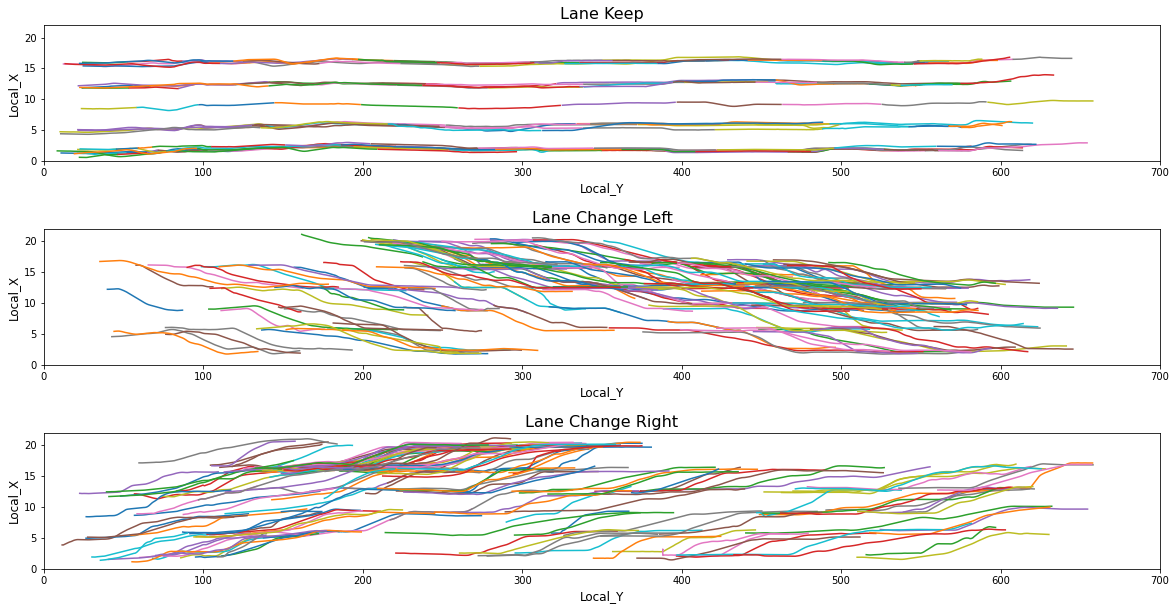

In [ ]:
from matplotlib import pyplot as plt
import time
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
from pylab import *
plt.figure(figsize=(20,10))
subplot(3,1,1)

title('Lane Keep', fontsize=16)
for path in lane_keep:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700)
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=12)
    plt.ylabel('Local_X', fontsize=12)

subplot(3,1,2)

title('Lane Change Left', fontsize=16)
for path in lane_change_left:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700)
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=12)
    plt.ylabel('Local_X', fontsize=12)
subplot(3,1,3)

title('Lane Change Right', fontsize=16)
for path in lane_change_right:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700)
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=12)
    plt.ylabel('Local_X', fontsize=12)



plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

In [ ]:
for i in lane_keep:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_left:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_right:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
print(lane_change_right[1])

Libraries

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
# TPU     ---> Tensor Processing Unit
import numpy as np
import pandas as pd
import math
import os
import os.path
import matplotlib.pyplot as plt
import imutils
import glob   ### for loding file in specific path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pwd


/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
I_80_Folder="/content/drive/My Drive/Colab Notebooks/Data/I-80.csv"
US_101_Folder="/content/drive/My Drive/Colab Notebooks/Data/us-101.csv"
output_Folder="/content/drive/My Drive/Colab Notebooks/Data"